In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

df=pd.read_csv('../data/spam.csv', encoding='ISO-8859-1')
display(df.head())

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [4]:
df = df.rename(columns={"v1": "label", "v2": "message"})  # Rename columns

# Check for missing values
print(df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()

# Map labels to numerical values
df["label"] = df["label"].map({"spam": 1, "ham": 0})

label            0
message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [5]:
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Apply cleaning
df["cleaned_message"] = df["message"].apply(clean_text)
# Add a new column for message length
df["message_length"] = df["message"].apply(len)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
display(df.head())

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,cleaned_message,message_length
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go jurong point crazy available bugis n great ...,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar joking wif u oni,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entry wkly comp win fa cup final tkts st ...,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say early hor u c already say,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah dont think goes usf lives around though,61


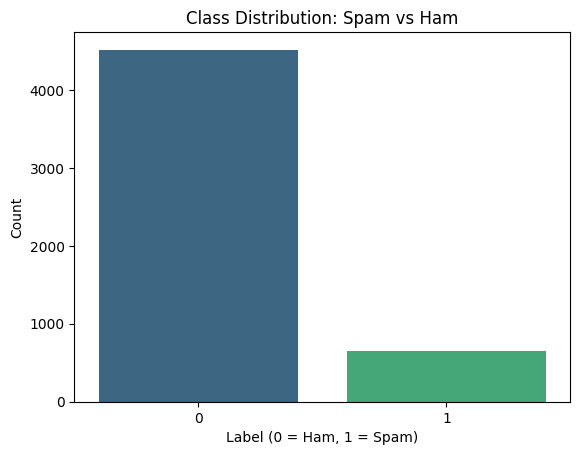

Class Distribution:
 label
0    4516
1     653
Name: count, dtype: int64
Percentage of Spam Messages: 12.63%


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for class distribution
sns.countplot(x="label", data=df, palette="viridis")
plt.title("Class Distribution: Spam vs Ham")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.show()

# Print percentages
spam_count = df["label"].value_counts()
print("Class Distribution:\n", spam_count)
print("Percentage of Spam Messages: {:.2f}%".format((spam_count[1] / len(df)) * 100))


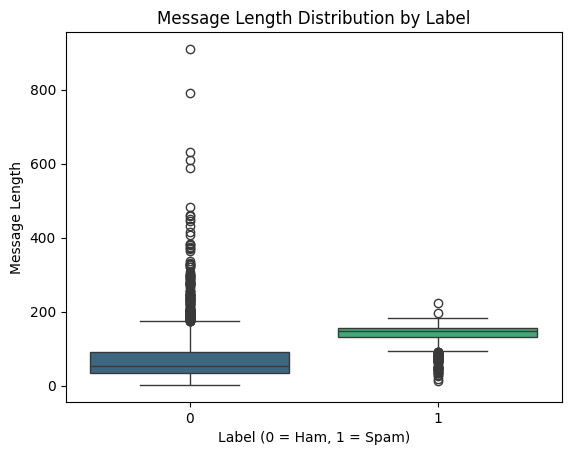

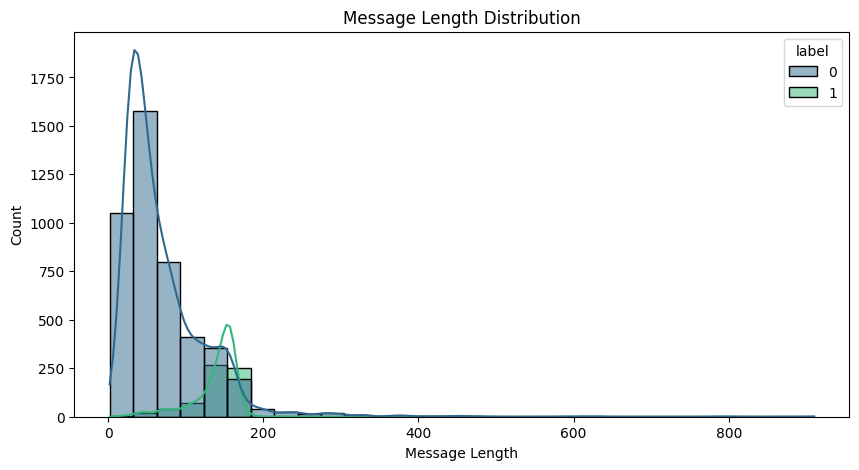

In [8]:
# Boxplot of message length by label
sns.boxplot(x="label", y="message_length", data=df, palette="viridis")
plt.title("Message Length Distribution by Label")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Message Length")
plt.show()

# Histogram of message lengths
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="message_length", hue="label", bins=30, kde=True, palette="viridis")
plt.title("Message Length Distribution")
plt.xlabel("Message Length")
plt.ylabel("Count")
plt.show()


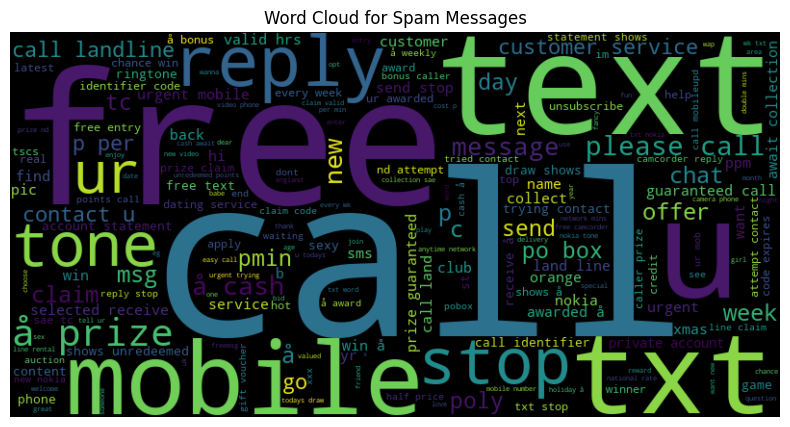

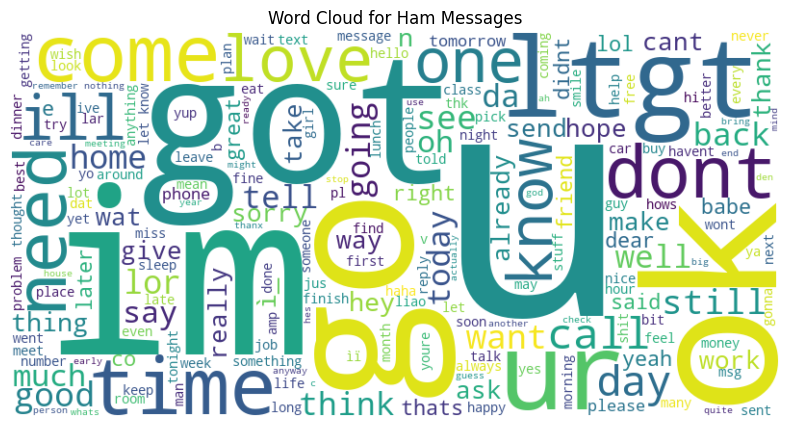

In [9]:
from wordcloud import WordCloud

# Word cloud for spam messages
spam_words = " ".join(df[df["label"] == 1]["cleaned_message"])
spam_wordcloud = WordCloud(width=800, height=400, background_color="black").generate(spam_words)

# Word cloud for ham messages
ham_words = " ".join(df[df["label"] == 0]["cleaned_message"])
ham_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(ham_words)

# Plot word clouds
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation="bilinear")
plt.title("Word Cloud for Spam Messages")
plt.axis("off")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation="bilinear")
plt.title("Word Cloud for Ham Messages")
plt.axis("off")
plt.show()


In [16]:
df.to_csv('../data/spam_cleaned.csv', index=False)